## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True)

from IPython.display import display

import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy as shc
from sklearn import metrics


## Load the data

In [2]:
df_faa = pd.read_csv('baaa-aircraft-dataset.csv')


In [3]:
df_faa

,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Year,Probable Causes
0,27-Apr-20,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0.0,1,1,Postal,Flight,Europe,1920,Unknown Reasons
1,15-Sep-23,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0.0,0,0,Scheduled Revenue Flight,Flight,Europe,1923,Technical Factors
2,24-Apr-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2.0,3,3,Scheduled Revenue Flight,Flight,Europe,1924,Technical Factors
3,21-Aug-24,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0.0,5,0,Private,Flight,North America,1924,Technical Factors
4,9-Feb-25,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0.0,2,0,Postal,Flight,Africa,1925,Technical Factors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,25-Oct-18,Bulldog Flying Club,Piper PA-31 Cheyenne,"Atlantic Ocean, All World",2,2,3,3.0,5,5,Private,Flight,North America,2018,Unknown Reasons
588,6-Dec-18,USMC,Lockheed C-130 Hercules,"Pacific Ocean, All World",5,5,0,0.0,5,5,Refuelling,Flight,Asia,2018,Crashing The Other Objects
589,24-May-19,Hypo Consulting,Cessna 560 Citation Encore,"Atlantic Ocean, All World",1,1,0,0.0,1,1,Private,Flight,North America,2019,Unknown Reasons
590,9-Dec-19,FUERZA AEREA DE CHILE,Lockheed C-130 Hercules,"Drake Passage, All World",17,17,21,21.0,38,38,Military,Flight,Antartica,2019,Unknown Reasons


## Data Preparation

### Drop unused variable

In [4]:
df_faa = df_faa.drop(['Operator', 'A/C Type', 'Location', 'Year', 'Continent', 'Flight Phase'], axis=1)
df_faa

,Date,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Probable Causes
0,27-Apr-20,1,1,0,0.0,1,1,Postal,Unknown Reasons
1,15-Sep-23,0,0,0,0.0,0,0,Scheduled Revenue Flight,Technical Factors
2,24-Apr-24,1,1,2,2.0,3,3,Scheduled Revenue Flight,Technical Factors
3,21-Aug-24,5,0,0,0.0,5,0,Private,Technical Factors
4,9-Feb-25,2,0,0,0.0,2,0,Postal,Technical Factors
...,...,...,...,...,...,...,...,...,...
587,25-Oct-18,2,2,3,3.0,5,5,Private,Unknown Reasons
588,6-Dec-18,5,5,0,0.0,5,5,Refuelling,Crashing The Other Objects
589,24-May-19,1,1,0,0.0,1,1,Private,Unknown Reasons
590,9-Dec-19,17,17,21,21.0,38,38,Military,Unknown Reasons


In [5]:
df_faa = df_faa.drop(['Crew on board', 'Crew fatalities', 'PAX on board', 'PAX fatalities', 'Date'], axis=1)
df_faa

,Total on board,Total fatalities,Flight Type,Probable Causes
0,1,1,Postal,Unknown Reasons
1,0,0,Scheduled Revenue Flight,Technical Factors
2,3,3,Scheduled Revenue Flight,Technical Factors
3,5,0,Private,Technical Factors
4,2,0,Postal,Technical Factors
...,...,...,...,...
587,5,5,Private,Unknown Reasons
588,5,5,Refuelling,Crashing The Other Objects
589,1,1,Private,Unknown Reasons
590,38,38,Military,Unknown Reasons


In [6]:
print(df_faa['Flight Type'].value_counts())

Military                                   155
Survey / Patrol / Reconnaissance           123
Scheduled Revenue Flight                    50
Private                                     48
Bombing                                     47
Training                                    35
Delivery                                    21
Charter / Taxi                              21
Ferry                                       21
Postal                                      20
Cargo                                       19
Supply                                       7
Positioning                                  5
Meteorological / Weather                     5
Refuelling                                   4
Test                                         3
Executive / Corporate                        2
Humanitarian                                 2
Ambulance                                    2
Aerial photography                           1
Geographical / Geophysical / Scientific      1
Name: Flight 

### Use Commercial flight type only

In [7]:
df_com1 = df_faa["Flight Type"].isin(["Postal","Scheduled Revenue Flight","Charter / Taxi","Cargo"])
df_faa[df_com1]

,Total on board,Total fatalities,Flight Type,Probable Causes
0,1,1,Postal,Unknown Reasons
1,0,0,Scheduled Revenue Flight,Technical Factors
2,3,3,Scheduled Revenue Flight,Technical Factors
4,2,0,Postal,Technical Factors
5,2,0,Postal,Technical Factors
...,...,...,...,...
567,217,217,Scheduled Revenue Flight,Human Errors
572,78,78,Scheduled Revenue Flight,Unknown Reasons
575,5,5,Charter / Taxi,Poor Weather
578,239,239,Scheduled Revenue Flight,Disappeared Without Trace


In [8]:
coba = df_faa[df_com1]
print(coba['Flight Type'].value_counts())


Scheduled Revenue Flight    50
Charter / Taxi              21
Postal                      20
Cargo                       19
Name: Flight Type, dtype: int64


In [9]:
clust = coba.drop(['Flight Type'], axis=1)
clust

,Total on board,Total fatalities,Probable Causes
0,1,1,Unknown Reasons
1,0,0,Technical Factors
2,3,3,Technical Factors
4,2,0,Technical Factors
5,2,0,Technical Factors
...,...,...,...
567,217,217,Human Errors
572,78,78,Unknown Reasons
575,5,5,Poor Weather
578,239,239,Disappeared Without Trace


### Principal Component Analysis (PCA)

In [10]:
from sklearn import preprocessing

In [11]:
pca = coba.drop(['Flight Type', 'Probable Causes'], axis=1)
pca = pca.reset_index(drop=True)
pca

,Total on board,Total fatalities
0,1,1
1,0,0
2,3,3
3,2,0
4,2,0
...,...,...
105,217,217
106,78,78
107,5,5
108,239,239


In [12]:
# Get the head and tail of the sample pandas DataFrame
# Using the pd.option_context() function in Pandas
with pd.option_context('display.max_rows',10):
    print(pca)

     Total on board  Total fatalities
0                 1                 1
1                 0                 0
2                 3                 3
3                 2                 0
4                 2                 0
..              ...               ...
105             217               217
106              78                78
107               5                 5
108             239               239
109              66                66

[110 rows x 2 columns]


In [13]:
df = coba.drop(['Flight Type'], axis=1)
df = df.reset_index(drop=True)
df

,Total on board,Total fatalities,Probable Causes
0,1,1,Unknown Reasons
1,0,0,Technical Factors
2,3,3,Technical Factors
3,2,0,Technical Factors
4,2,0,Technical Factors
...,...,...,...
105,217,217,Human Errors
106,78,78,Unknown Reasons
107,5,5,Poor Weather
108,239,239,Disappeared Without Trace


In [14]:
print(pca.isnull().sum())

Total on board      0
Total fatalities    0
dtype: int64


In [15]:
scaler = preprocessing.StandardScaler()

In [16]:
standardScaler_df = scaler.fit_transform(pca)
print(standardScaler_df)

[[-0.50715588 -0.43457921]
 [-0.52734667 -0.45480074]
 [-0.46677431 -0.39413613]
 [-0.48696509 -0.45480074]
 [-0.48696509 -0.45480074]
 [-0.48696509 -0.45480074]
 [-0.52734667 -0.45480074]
 [-0.48696509 -0.45480074]
 [-0.50715588 -0.43457921]
 [-0.28505721 -0.45480074]
 [-0.52734667 -0.45480074]
 [-0.46677431 -0.45480074]
 [-0.44658352 -0.45480074]
 [-0.52734667 -0.45480074]
 [-0.48696509 -0.41435767]
 [-0.46677431 -0.45480074]
 [-0.46677431 -0.45480074]
 [-0.46677431 -0.45480074]
 [-0.48696509 -0.41435767]
 [-0.40620194 -0.33347152]
 [-0.40620194 -0.33347152]
 [-0.48696509 -0.45480074]
 [-0.40620194 -0.33347152]
 [-0.44658352 -0.3739146 ]
 [-0.36582037 -0.43457921]
 [-0.48696509 -0.41435767]
 [-0.42639273 -0.35369306]
 [-0.38601115 -0.31324999]
 [-0.24467564 -0.17169923]
 [-0.12353091 -0.05037001]
 [-0.22448485 -0.15147769]
 [-0.26486643 -0.39413613]
 [-0.36582037 -0.29302845]
 [-0.40620194 -0.33347152]
 [-0.20429406 -0.13125616]
 [-0.32543879 -0.25258538]
 [-0.16391249 -0.09081308]
 

In [17]:
scaler_df = pd.DataFrame(data = standardScaler_df, columns= ['Total on Board', 'Total Fatalities'])
scaler_df.head()

,Total on Board,Total Fatalities
0,-0.507156,-0.434579
1,-0.527347,-0.454801
2,-0.466774,-0.394136
3,-0.486965,-0.454801
4,-0.486965,-0.454801


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(standardScaler_df)

In [20]:
reduced_data.shape

(110, 2)

In [21]:
cluster_df = pd.DataFrame(data = reduced_data, columns= ['Total on Board', 'Total Fatalities'])
cluster_df.head(10)

,Total on Board,Total Fatalities
0,-0.665907,-0.051319
1,-0.694483,-0.051298
2,-0.608756,-0.051363
3,-0.665929,-0.022744
4,-0.665929,-0.022744
5,-0.665929,-0.022744
6,-0.694483,-0.051298
7,-0.665929,-0.022744
8,-0.665907,-0.051319
9,-0.523159,0.120027


## Clustering

In [22]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### Determine optimum cluster

C:\Users\dion\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


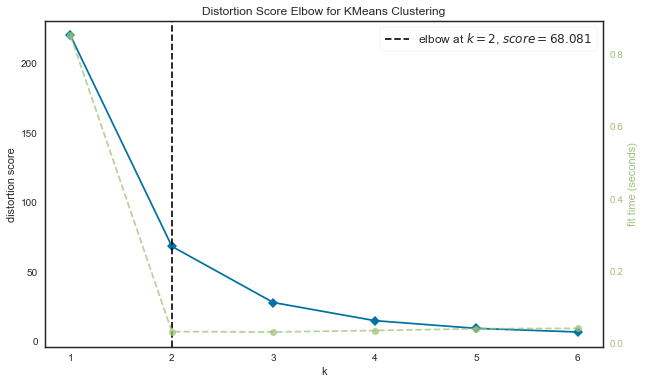

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
#cluster
X = cluster_df.iloc[:,0:10].values
km=KMeans(init='k-means++', max_iter=100, n_init=7, random_state=0)

sns.set_style("white")
plt.figure(figsize =(10, 6))

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,7))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [24]:
X = pca.iloc[:,0:10].values
X

array([[  1,   1],
       [  0,   0],
       [  3,   3],
       [  2,   0],
       [  2,   0],
       [  2,   0],
       [  0,   0],
       [  2,   0],
       [  1,   1],
       [ 12,   0],
       [  0,   0],
       [  3,   0],
       [  4,   0],
       [  0,   0],
       [  2,   2],
       [  3,   0],
       [  3,   0],
       [  3,   0],
       [  2,   2],
       [  6,   6],
       [  6,   6],
       [  2,   0],
       [  6,   6],
       [  4,   4],
       [  8,   1],
       [  2,   2],
       [  5,   5],
       [  7,   7],
       [ 14,  14],
       [ 20,  20],
       [ 15,  15],
       [ 13,   3],
       [  8,   8],
       [  6,   6],
       [ 16,  16],
       [ 10,  10],
       [ 18,  18],
       [  4,   4],
       [  4,   4],
       [  3,   3],
       [  3,   3],
       [  3,   3],
       [ 17,  17],
       [  7,   7],
       [  4,   4],
       [  3,   3],
       [  8,   8],
       [  5,   5],
       [  2,   2],
       [ 23,   0],
       [ 10,  10],
       [  2,   2],
       [ 69,

In [25]:
##Fitting kmeans to the dataset
km2=KMeans(n_clusters=2,init='k-means++', max_iter=400, n_init=10, random_state=0)
y_means = km2.fit_predict(X)

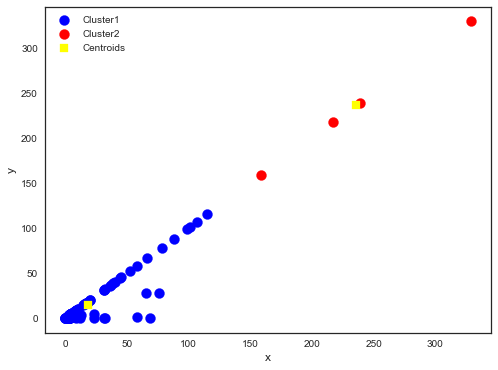

In [26]:
#Visualising the clusters for k=2
plt.figure(figsize =(8, 6))
sns.set_style("white")
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100, c='blue',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100, c='red',label='Cluster2')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],s=50,marker='s', c='yellow', label='Centroids')
### plt.xlabel('Annual income of customer')
### plt.ylabel('Annual spend from customer on site')
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.show()

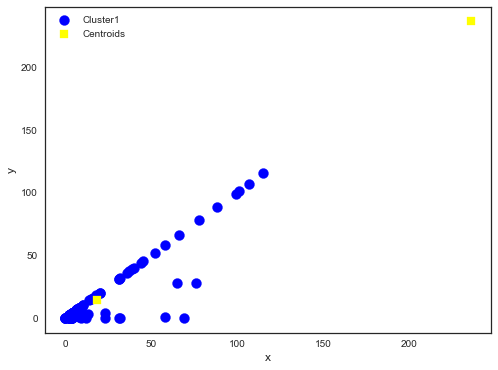

In [27]:
#Visualising the clusters for k=2
plt.figure(figsize =(8, 6))
sns.set_style("white")
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100, c='blue',label='Cluster1')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],s=50,marker='s', c='yellow', label='Centroids')
### plt.xlabel('Annual income of customer')
### plt.ylabel('Annual spend from customer on site')
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.show()

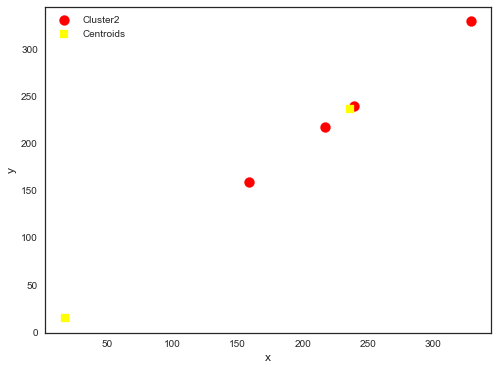

In [28]:
#Visualising the clusters for k=2
plt.figure(figsize =(8, 6))
sns.set_style("white")
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100, c='red',label='Cluster2')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],s=50,marker='s', c='yellow', label='Centroids')
### plt.xlabel('Annual income of customer')
### plt.ylabel('Annual spend from customer on site')
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.show()

In [29]:
km2.fit(pca)
labels = km2.labels_
hasil_clusterver2=pd.concat([pca,pd.DataFrame({'Cluster':labels})], axis=1)
hasil_clusterver2.head(20)

,Total on board,Total fatalities,Cluster
0,1,1,0
1,0,0,0
2,3,3,0
3,2,0,0
4,2,0,0
5,2,0,0
6,0,0,0
7,2,0,0
8,1,1,0
9,12,0,0


In [30]:
hasil_clusterver2=pd.concat([df,pd.DataFrame({'Cluster':labels})], axis=1)
hasil_clusterver2.head(20)

,Total on board,Total fatalities,Probable Causes,Cluster
0,1,1,Unknown Reasons,0
1,0,0,Technical Factors,0
2,3,3,Technical Factors,0
3,2,0,Technical Factors,0
4,2,0,Technical Factors,0
5,2,0,Technical Factors,0
6,0,0,Unknown Reasons,0
7,2,0,Technical Factors,0
8,1,1,Disappeared Without Trace,0
9,12,0,Technical Factors,0


In [31]:
print(hasil_clusterver2['Probable Causes'].value_counts())

Technical Factors             40
Unknown Reasons               19
Disappeared Without Trace     19
Poor Weather                  12
Conflict Factors              10
Human Errors                   8
Crashing The Other Objects     2
Name: Probable Causes, dtype: int64


In [32]:
hasil_clusterver2

,Total on board,Total fatalities,Probable Causes,Cluster
0,1,1,Unknown Reasons,0
1,0,0,Technical Factors,0
2,3,3,Technical Factors,0
3,2,0,Technical Factors,0
4,2,0,Technical Factors,0
...,...,...,...,...
105,217,217,Human Errors,1
106,78,78,Unknown Reasons,0
107,5,5,Poor Weather,0
108,239,239,Disappeared Without Trace,1


In [33]:
hasil_cluster1=pd.DataFrame(data = hasil_clusterver2[hasil_clusterver2['Cluster'] == 0])
hasil_cluster1

,Total on board,Total fatalities,Probable Causes,Cluster
0,1,1,Unknown Reasons,0
1,0,0,Technical Factors,0
2,3,3,Technical Factors,0
3,2,0,Technical Factors,0
4,2,0,Technical Factors,0
...,...,...,...,...
103,9,9,Unknown Reasons,0
104,3,3,Unknown Reasons,0
106,78,78,Unknown Reasons,0
107,5,5,Poor Weather,0


In [34]:
print(hasil_cluster1['Probable Causes'].value_counts())

Technical Factors             39
Unknown Reasons               19
Disappeared Without Trace     18
Poor Weather                  12
Conflict Factors              10
Human Errors                   7
Crashing The Other Objects     1
Name: Probable Causes, dtype: int64


In [35]:
hasil_cluster3=pd.DataFrame(data = hasil_clusterver2[hasil_clusterver2['Cluster'] == 1])
hasil_cluster3

,Total on board,Total fatalities,Probable Causes,Cluster
96,329,329,Crashing The Other Objects,1
98,159,159,Technical Factors,1
105,217,217,Human Errors,1
108,239,239,Disappeared Without Trace,1


In [36]:
print(hasil_cluster3['Probable Causes'].value_counts())

Crashing The Other Objects    1
Technical Factors             1
Human Errors                  1
Disappeared Without Trace     1
Name: Probable Causes, dtype: int64


## Data Analysis

According to the findings of the research above, the data that is impacting the data may be divided into two clusters: total variable victims and total passengers. so that when it was created, Cluster 1 included casualties and passengers in the range of 0 to 115, while Cluster 2 had victims in the range of 159 to as many as 329.

and for more analytical findings, namely in the form of:
1. The most causes of accidents are 40 engine problems. Then at least crashing into other objects
2. The highest number of passengers and victims is 329 victims